##**Business Case - Yulu**

**Problem Statement**

Yulu wants to understand which factors significantly affect the demand for shared electric cycles in India and how well these factors explain demand variations.

**Dependent Variable:** count (Total number of electric cycles rented)

**Independent Variables:**

workingday

season

weather

temp, atemp, humidity, windspeed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from scipy.stats import shapiro, levene




data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
data.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Observations**

No missing values detected

season, holiday, workingday, weather are categorical

count is continuous (target variable)

In [ ]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    data[col] = data[col].astype('category')


**Univariate Analysis**

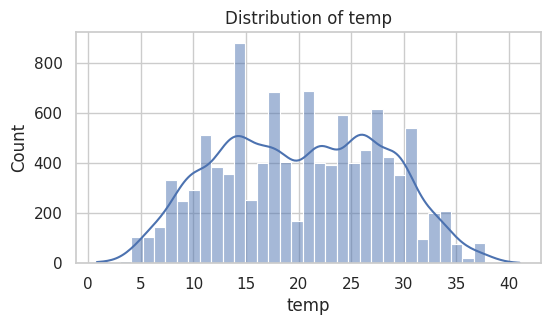

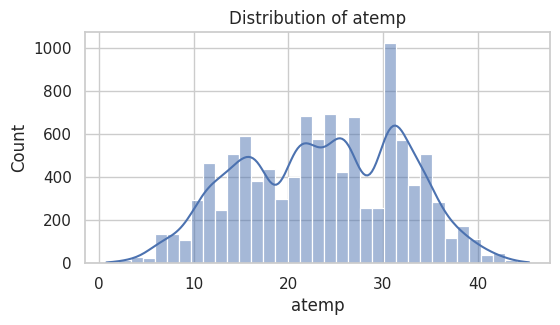

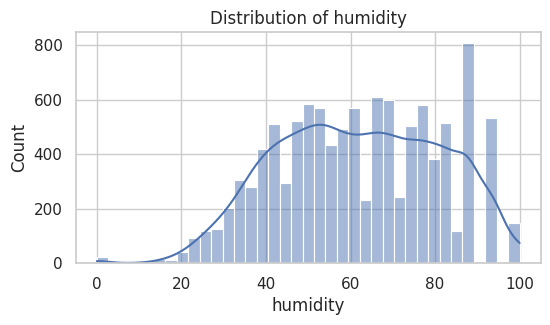

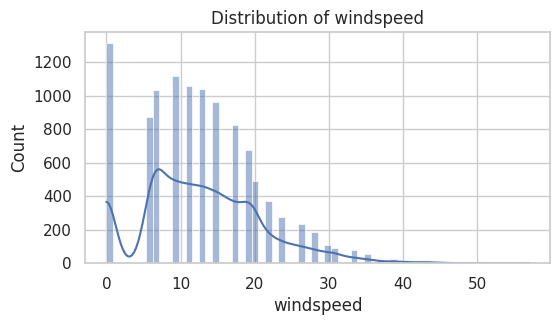

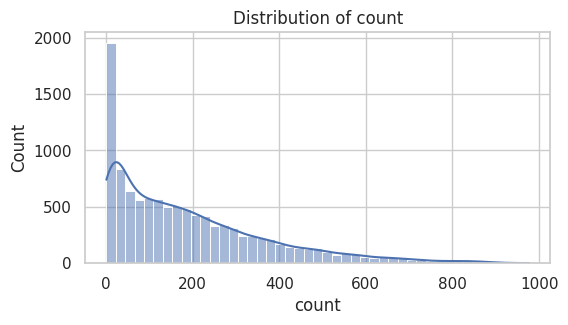

In [ ]:
# Continuous Variables
cont_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

for col in cont_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


**Insights**

count is right-skewed

humidity shows wide variation

windspeed mostly concentrated at lower values

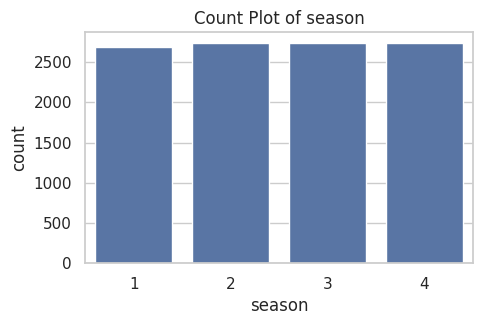

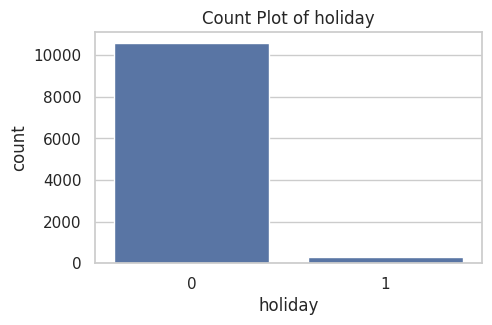

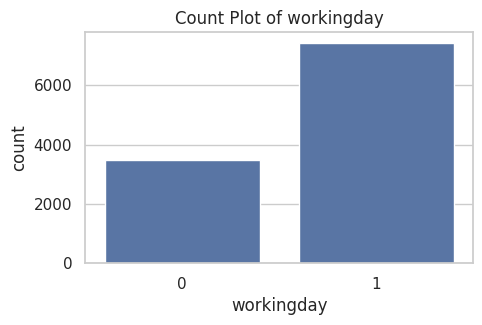

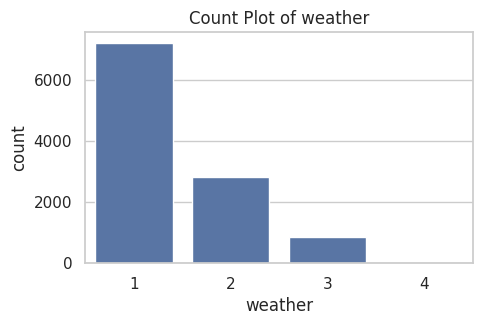

In [ ]:
# Categorical Variables
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=data[col])
    plt.title(f'Count Plot of {col}')
    plt.show()


**Insights**

Majority days are working days

Weather type 1 (Clear) is most frequent

**Bivariate Analysis**

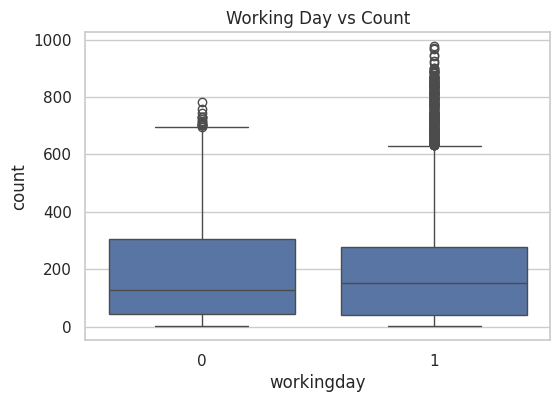

In [ ]:
# Working Day vs Count
plt.figure(figsize=(6,4))
sns.boxplot(x='workingday', y='count', data=data)
plt.title('Working Day vs Count')
plt.show()


**Observation**

Higher median rentals on working days

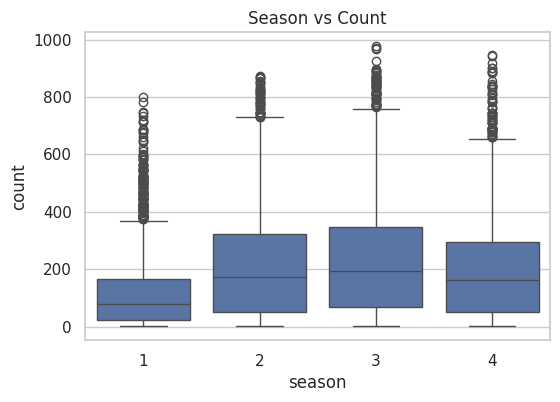

In [ ]:
# Season vs Count
plt.figure(figsize=(6,4))
sns.boxplot(x='season', y='count', data=data)
plt.title('Season vs Count')
plt.show()

**Observation**

Rentals vary significantly across seasons

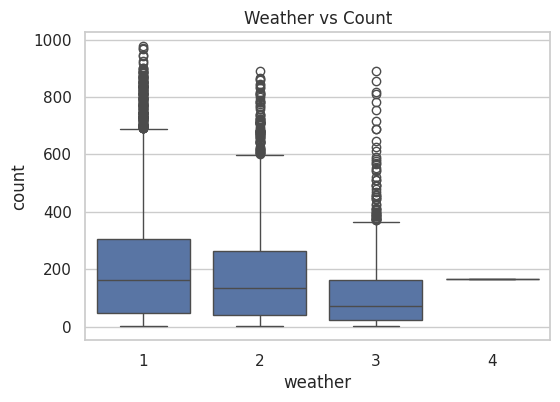

In [ ]:
# Weather vs Count
plt.figure(figsize=(6,4))
sns.boxplot(x='weather', y='count', data=data)
plt.title('Weather vs Count')
plt.show()


**Observation**

Clear weather has the highest rentals

Extreme weather reduces demand

**Hypothesis Testing**

In [ ]:
# Does Working Day affect rentals?

# Hypotheses
# H0: Mean rentals on working and non-working days are equal
# H1: Mean rentals differ

In [ ]:
working = data[data['workingday'] == 1]['count']
non_working = data[data['workingday'] == 0]['count']

In [ ]:
shapiro(working.sample(500))


ShapiroResult(statistic=np.float64(0.8925941553909312), pvalue=np.float64(3.2636646881262204e-18))

In [ ]:
shapiro(non_working.sample(500))

ShapiroResult(statistic=np.float64(0.8786656511694594), pvalue=np.float64(2.416639988266257e-19))

In [ ]:
levene(working, non_working)

LeveneResult(statistic=np.float64(0.004972848886504472), pvalue=np.float64(0.9437823280916695))

In [ ]:
# T-Test
t_stat, p_value = ttest_ind(working, non_working, equal_var=False)
t_stat, p_value

(np.float64(1.2362580418223226), np.float64(0.21640312280695098))

In [ ]:
if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to Reject H0")

Fail to Reject H0


In [ ]:
# ANOVA – Season vs Count

# Hypotheses
# H0: Mean rentals are same across all seasons
# H1: At least one season differs


In [ ]:
season_groups = [data[data['season'] == s]['count'] for s in data['season'].cat.categories]

In [ ]:
f_stat, p_value = f_oneway(*season_groups)
f_stat, p_value


(np.float64(236.94671081032098), np.float64(6.164843386499654e-149))

In [ ]:
if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to Reject H0")

Reject H0


In [ ]:
# ANOVA – Weather vs Count

# Hypotheses
# H0: Mean rentals are same for all weather conditions
# H1: Mean rentals differ

In [ ]:
weather_groups = [data[data['weather'] == w]['count'] for w in data['weather'].cat.categories]


In [ ]:
f_stat, p_value = f_oneway(*weather_groups)
f_stat, p_value


(np.float64(65.53024112793265), np.float64(5.482069475935669e-42))

In [ ]:
if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to Reject H0")

Reject H0


In [ ]:
# Chi-Square Test

# Is Weather dependent on Season?
# Hypotheses
# H0: Weather and Season are independent
# H1: Weather depends on Season

In [ ]:
contingency_table = pd.crosstab(data['season'], data['weather'])
contingency_table


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p


(np.float64(49.158655596893624), np.float64(1.549925073686492e-07))

In [ ]:
if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to Reject H0")

Reject H0


**Final Business Conclusion**


*   Working day does not significantly impact demand.
*   Season and weather are strong predictors of electric cycle rentals.
*   Demand increases in favorable weather and peak seasons.
*   Yulu should:
*   *   Plan fleet availability seasonally
*   *   Use dynamic pricing during low-demand weather
*   *   Run promotions during adverse conditions to stabilize demand

**Conclusion**

The analysis was conducted to identify the factors influencing the demand for shared electric cycles at Yulu. Exploratory Data Analysis and hypothesis testing reveal that season and weather conditions play a significant role in determining rental demand, while working day status does not have a statistically significant impact on the number of cycles rented.

Specifically, demand varies considerably across different seasons and weather conditions, with higher rentals observed during favorable weather and peak seasons. The Chi-square test further confirms that weather is dependent on season, reinforcing the presence of seasonality in demand patterns.

Overall, the results indicate that external environmental factors are stronger predictors of demand than calendar-based factors such as working days. These insights can help Yulu optimize fleet allocation, operational planning, and promotional strategies to improve utilization and revenue.